In [79]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [80]:
df = pd.DataFrame()

In [81]:
df['X1'] = [1,2,3,4,5,6,7,8,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [82]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,7,5,0
7,8,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

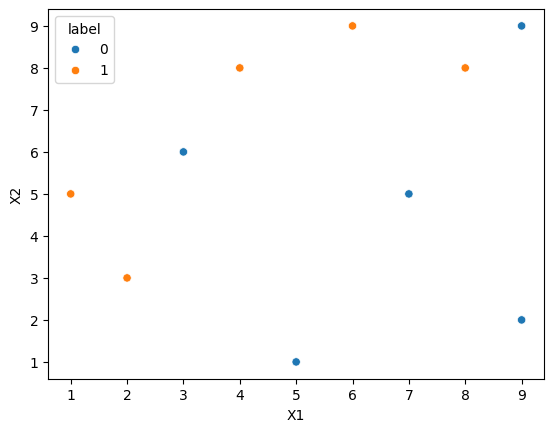

In [83]:
sns.scatterplot(x=df['X1'], y = df['X2'], hue = df['label'])

In [84]:
df['weight'] = 1/df.shape[0]

In [85]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,7,5,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [86]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [87]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [88]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

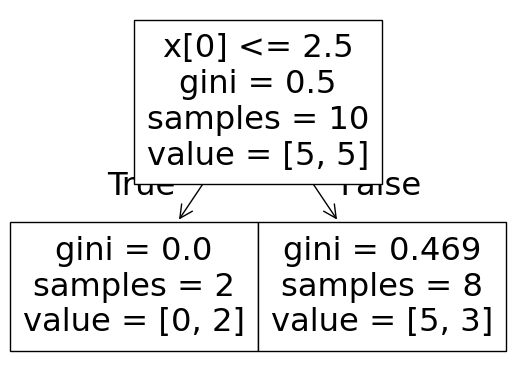

In [89]:
plot_tree(dt1)

<Axes: >

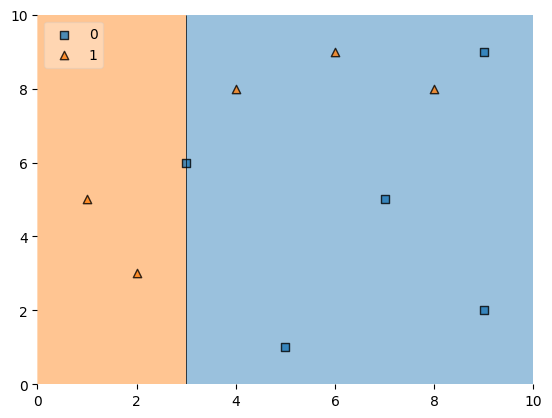

In [90]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [91]:
df['y_pred'] = dt1.predict(X)

In [92]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,7,5,0,0.1,0
7,8,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [93]:
def calculate_model_wight(error):
    return 0.5* np.log(((1-error)/error))

In [94]:
# calculate model weight
alpha1 = calculate_model_wight(0.3)
alpha1

np.float64(0.42364893019360184)

In [95]:
# update weights
def update_row_weights(row,alpha=alpha1):
    if row['label'] == row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [96]:
df['update_weights'] = df.apply(update_row_weights,axis=1)

In [97]:
df

,X1,X2,label,weight,y_pred,update_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,0,0.152753
6,7,5,0,0.1,0,0.065465
7,8,8,1,0.1,0,0.152753
8,9,9,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465


In [98]:
df['update_weights'].sum()

np.float64(0.9165151389911682)

In [99]:
df['normalized_weights'] = df['update_weights']/df['update_weights'].sum()


In [100]:
df

,X1,X2,label,weight,y_pred,update_weights,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,7,5,0,0.1,0,0.065465,0.071429
7,8,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


In [101]:
df['normalized_weights'].sum()

np.float64(0.9999999999999999)

In [102]:
df['cumsum_upper'] = np.cumsum([df['normalized_weights']])


In [103]:
df.drop('normalized_weights',axis=1,inplace=True)


In [104]:
df.rename(columns={'normalized_wights':'normalized_weights'},inplace=True)


In [105]:
print(df.columns)


Index(['X1', 'X2', 'label', 'weight', 'y_pred', 'update_weights',
       'cumsum_upper'],
      dtype='object')


In [106]:
df['normalized_weights'] = df['weight'] / df['weight'].sum()
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']


In [107]:
df[['X1','X2','label','weight','y_pred','update_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weight,y_pred,update_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065465,-0.028571,0.071429
1,2,3,1,0.1,1,0.065465,0.042857,0.142857
2,3,6,0,0.1,0,0.065465,0.114286,0.214286
3,4,8,1,0.1,0,0.152753,0.280952,0.380952
4,5,1,0,0.1,0,0.065465,0.352381,0.452381
5,6,9,1,0.1,0,0.152753,0.519048,0.619048
6,7,5,0,0.1,0,0.065465,0.590476,0.690476
7,8,8,1,0.1,0,0.152753,0.757143,0.857143
8,9,9,0,0.1,0,0.065465,0.828571,0.928571
9,9,2,0,0.1,0,0.065465,0.900000,1.000000


In [108]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [109]:
index_values = create_new_dataset(df)


In [110]:
index_values

[1, 6, 1, 7, 8, 1, 9, 3, 4, 9, 4]

In [111]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weight
1,2,3,1,0.1
6,7,5,0,0.1
1,2,3,1,0.1
7,8,8,1,0.1
8,9,9,0,0.1
1,2,3,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
9,9,2,0,0.1


In [112]:
dt2 = DecisionTreeClassifier(max_depth=1)


In [113]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [114]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.625, 0.5, '  False')]

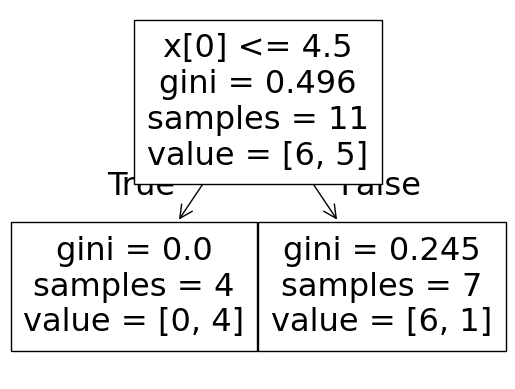

In [115]:
plot_tree(dt2)

<Axes: >

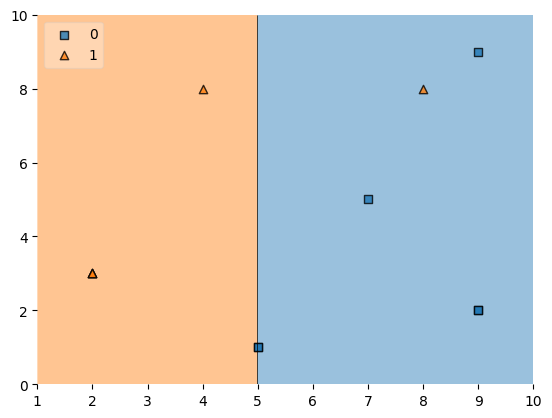

In [116]:
plot_decision_regions(X,y,clf=dt2,legend=2)


In [117]:
second_df['y_pred'] = dt2.predict(X)


In [118]:
second_df


,X1,X2,label,weight,y_pred
1,2,3,1,0.1,1
6,7,5,0,0.1,0
1,2,3,1,0.1,1
7,8,8,1,0.1,0
8,9,9,0,0.1,0
1,2,3,1,0.1,1
9,9,2,0,0.1,0
3,4,8,1,0.1,1
4,5,1,0,0.1,0
9,9,2,0,0.1,0


In [119]:
alpha2 = calculate_model_wight(0.2)


In [120]:
# Step 4 - Update weights
def update_row_weights(row,alpha=alpha2):
  if row['label'] == row['y_pred']:
    return row['weight'] * np.exp(-alpha)
  else:
    return row['weight'] * np.exp(alpha)

In [121]:
# update weights
second_df['updated_weights'] = second_df.apply( update_row_weights,axis=1)

In [122]:
second_df

,X1,X2,label,weight,y_pred,updated_weights
1,2,3,1,0.1,1,0.05
6,7,5,0,0.1,0,0.05
1,2,3,1,0.1,1,0.05
7,8,8,1,0.1,0,0.20
8,9,9,0,0.1,0,0.05
1,2,3,1,0.1,1,0.05
9,9,2,0,0.1,0,0.05
3,4,8,1,0.1,1,0.05
4,5,1,0,0.1,0,0.05
9,9,2,0,0.1,0,0.05


In [123]:
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()

In [124]:
second_df

,X1,X2,label,weight,y_pred,updated_weights,normalized_weights
1,2,3,1,0.1,1,0.05,0.071429
6,7,5,0,0.1,0,0.05,0.071429
1,2,3,1,0.1,1,0.05,0.071429
7,8,8,1,0.1,0,0.20,0.285714
8,9,9,0,0.1,0,0.05,0.071429
1,2,3,1,0.1,1,0.05,0.071429
9,9,2,0,0.1,0,0.05,0.071429
3,4,8,1,0.1,1,0.05,0.071429
4,5,1,0,0.1,0,0.05,0.071429
9,9,2,0,0.1,0,0.05,0.071429


In [125]:
second_df['normalized_weights'].sum()

np.float64(0.9999999999999998)

In [126]:
second_df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [127]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']


In [128]:
second_df[['X1','X2','label','weight','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weight,y_pred,normalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.071429,0.128571,0.2
6,7,5,0,0.1,0,0.071429,0.628571,0.7
1,2,3,1,0.1,1,0.071429,0.128571,0.2
7,8,8,1,0.1,0,0.285714,0.514286,0.8
8,9,9,0,0.1,0,0.071429,0.828571,0.9
1,2,3,1,0.1,1,0.071429,0.128571,0.2
9,9,2,0,0.1,0,0.071429,0.928571,1.0
3,4,8,1,0.1,1,0.071429,0.328571,0.4
4,5,1,0,0.1,0,0.071429,0.428571,0.5
9,9,2,0,0.1,0,0.071429,0.928571,1.0


In [129]:
def create_new_dataset(df):
    count =0
    indices = []
    
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                count += 1
                indices.append(index)
    print(df.shape[0],count)
    return indices
    
index_values = create_new_dataset(second_df)

11 9


In [130]:
index_values

[9, 9, 7, 8, 7, 6, 7, 6, 7]

In [131]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weight
9,9,2,0,0.1
9,9,2,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1


In [132]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

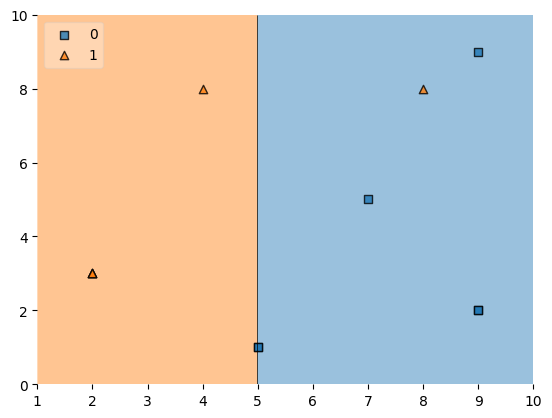

In [133]:
plot_decision_regions(X,y,clf=dt3,legend=2)

In [134]:
y_pred = dt3.predict(X)

if len(y_pred) == len(third_df):
    third_df['y_pred'] = y_pred
else:
    print(f"Mismatch: third_df has {len(third_df)} rows, but predictions are {len(y_pred)}.")


Mismatch: third_df has 9 rows, but predictions are 11.


In [135]:
third_df

,X1,X2,label,weight
9,9,2,0,0.1
9,9,2,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1


In [136]:
alpha3 = calculate_model_wight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [137]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 -0.4236489301936017


#Prediction

In [138]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [139]:
dt2.predict(query)

array([1])

In [140]:
dt3.predict(query)

array([1])

In [141]:
signal = alpha1*1 + alpha2*1 + alpha3*1

In [142]:
np.sign(signal)

np.float64(1.0)

In [143]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [144]:
dt2.predict(query)

array([0])

In [145]:
dt3.predict(query)

array([0])

In [146]:
sign1 = alpha1*(1) + alpha2*(-1) + alpha3*(-1)

In [147]:
np.sign(sign1)

np.float64(1.0)

In [148]:
sign1

np.float64(0.15415067982725827)